# 신경망_ 

- 신경망학습은 가중치를 학습한다 
- 가중치는 행렬로 되어있음
- 하나의 행은 data point(관측치)를 나타낸다
- 하나의 열은 변수를 나타낸다 
- 파이썬은 열중심 
- 행렬의 곱은 내적을 낸다는 의미 
- 내적: 데이터를 어떻게 설명할지 _ 설명력 
- x축 1,0,0 , y축 0,1,0  선a의 좌표가  2,4,5면 x축과의 거리는 2 / 
- 5개의 변수가 들어오는 값을 하나로=> 그래서 이걸 표현하려고 가중치 필요 : 회귀
    - 2,5 * 5,1 곱하면 5개의 변수가 1개로 
    
[ Activation function ]
- 예측은 MSE로 측정,분류는 Enthrophy로신
- 선형문제를 비선형문제로 풀기위해서 활성화 함수 사용 
- 현실의 대부분은 모두 비선형으로 나옴 
    - sigmoid 0~1
    - tanh -1 ~ 1
    - softmax :분류기
- DEEP 해지면 정확도가 올라가고 속도도 빨라짐

- ACCURACY 대신 COST FUNCTION 사용 
    - COST를 통해 방향갑을 학습한다
    - ACCURACY 는 맞으면 값이 변화가 없다 
    - 가중치 학습 및 조절하는게 역전파
- 면적: 적분 , 기울기:미분       
- 미니배치 : 데이터를 자른다
    - 잘라서평균값으로 한다
    - 지역해문제 해결 
    - 속도가 빨라짐
    - Queue : 데이터가 너무 많을 경우 메모리에 큐를 만듬 , 순차적으로 빼내감 
    
[ optimizer ]
 - optimizer은  learning rate와 기울기 컨트롤
 - learning rate 너무크면 발산 너무 작으면 시간이 오래걸린다 : 이걸 조절하는게 optimizer
     - 가기전에 결정: momentom
     - 가면서 하는게: NOV
 - Momentom 과 NOV 모두 고려한것이 ADAM : But adam이 가장 좋은 방법은 아니다
 
[cf]

- 지도학습
     - [CNN]: convolution으로 특성을 뽑는다
     - [RNN]: 순서가 있는 데이터
-  비지도학습
 GAN

## Tensorflow
- 기본적인 자료구조는 그래프 
- node간 edge로 
- tensor 은  다차원배열
- node 간 계산하려면 tensor가 도착해야함


- 분산처리 : 여러대가 합쳐서 일 처리 : 가장 중요한 문제는 동기화 
    - 병렬처리
    - pc분산
- CPU
    - 부동소수점 연산기 4-8개: 속도가 느림 
    ↓
    ↓  데이터를 GPU에 옮기고 처리하고 다시 가져오자!
    ↓    이를 위해서는 CUDA cudnn 설치해야함 
    
- GPU
    - 부동소수점 연산기 1024개
    
    - memory : cpu와 연결해야함 : 'session 연결'  #session 이란 말이 나오면 gpu에 명령하는구나 ~
        - 데이터 저장영역
        - 프로그램 영역
    - **변수 세개 **
        - constant: 상수지정
        - variables : 가중치 선언
        - place holder : 외부에서 주입된 변수 

### 설치

In [ ]:
#현재 텐서플로우는 버전 2.0넘어감
#하지만 사용하는건 1.~ 버전을 많이 사용하고있음 
# conda install tesorflow 
import tensorflow as tf
print(tf.__version__)

### 가상환경 설치 


In [ ]:
# 앞에서 안되서
#가상환경 설치
# tf_test는 가상환경 이름 

#conda create --name tf_test python anaconda

#activate tf_test  #가상환경 활성화

#conda update conda

#conda update pip

#conda install numpy
#conda install pandas
#conda install jupyter
#conda install scipy
#conda install seaborn

#conda install tensorflow=1.14.0
#jupyter kernel install


# tf test notebook 실행 

# 데이터 타입

In [ ]:
# 데이터 타입
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!') 
sess=tf.Session() #세션 연결
print(hello) #연결하기전에 출력하면 데이터 직접 확인 불가 

print(sess.run(hello)) #세션에 연결하고 출력하면 numpy데이터로 변경



# tensorflow 에는 변수 3개
# constant,variables, place holder


In [ ]:
# 모델의 그래프 구조확인
# 모델을 그대로 저장(가중치)할 때 메모리 위치를 확인하기 위해서 

x= tf.constant(35,name='x') # 이름 지정한 것으로 위치확인  # 이름 지정안하면 찾을 수 없음 

y=tf.Variable(x+5,name='y') #변수가 있는 경우 반드시 초기화하기

print(y)

# 초기화

In [ ]:
# variable(뼌수) 초기화 하는법 

model = tf.global_variables_initializer()
##################### 여기까지 모델을 만드는 과정


with tf.Session() as session:
    session.run(model)
    print(session.run(y))
    

In [ ]:
# 판다스에서 데이터 초기화(list,dict)한것과 동일하게 초기화

a = tf.constant([1,2,3],name='a')  # TF.CONSTANT:GPU에공간을 만드는 것
b = tf.constant([4,5,6],name='b')
add_op = a+b  #배열연산 #요소끼리 계산 

with tf.Session() as session:
    print(session.run(add_op))


# Place holder

In [ ]:
# 주입변수

# a b 가 있어야 add mul 가능/ add mul 이있어야 total 가능 _ 순차적 _ 주렁주렁 다 엮여있음 
# 밑에 연산을 하면 자료구조 : Graph가 구성 (골격구조 형성)


a = tf.placeholder(tf.int16) #데이터 없이 공간만 확보 
b= tf.placeholder(tf.int16)
add = tf.add(a,b) #두개를 더하는 연산
mul = tf.multiply(a,b) #곱하는 연산
total = tf.multiply(add,mul)  #두결과 곱하는 것

In [ ]:
with tf.Session() as sess:   #with 안에서 초기화하면 with 가 끝나면 자동 소멸  sess 로 인스턴스 됨
    print('feed 변수 합: %i'%sess.run(add,feed_dict={a:2,b:3}))  #데이터 주입 호출
    
    print('feed 변수 곱: %i'%sess.run(mul,feed_dict={a:2,b:3}))
    
    print('feed 변수 곱: %i'%sess.run(total,feed_dict={a:2,b:3}))

In [ ]:
with tf.Session() as sess:   #with 안에서 초기화하면 with 가 끝나면 자동 소멸  sess 로 인스턴스 됨
  
    print('feed 변수 곱: %i'%sess.run(total,feed_dict={a:2,b:3}))
    
    
    #위에 두 과정이 없어도 결과값이 나옴  _ 골격을 만들고 run 으로 호출
    # 그래프 구조로 연결되어있어서 앞에 값없어도 나오는것

In [ ]:
# constant 상수 : 값을 바꿀 수 없다 

matrix1 = tf.constant([[3.,3.]])  # 1x2
matrix2 = tf.constant([[2.],[2.]])# 2x1    #두개곱하면 1x1
product = tf.matmul(matrix1,matrix2)# matrix multiply
with tf.Session() as sess: #실행부 
    result = sess.run(product)
    print(result)

In [ ]:
zeros = tf.zeros([2,2]) #zeros 는 모든 변수를 0으로  2x2 행렬을 모두 0으로
ones = tf.ones([6]) # 1으로
#uniform  : 균등분포
uniform = tf.random_uniform([3,3,3],minval=0.0,maxval=10)
# normal : 정규분포
normal = tf.random_normal([3,3,3],mean=0.0,stddev=2.0)
#trucated normal : 표준편차 2배내의 것으로 초기화 
trunc = tf.truncated_normal([2,2],mean=5.0,stddev=1.0)
random_var = tf.Variable(tf.truncated_normal([2,2]))

In [ ]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(trunc))
print('변수초기화',sess.run(random_var))

In [ ]:
import tensorflow as tf
my_tensor = tf.constant(0,shape=[6,2]) #constant 를 0 으로 초기화하고 6x2

my_static_shape = my_tensor.get_shape()
print(type(my_static_shape)) #class
print(my_static_shape) #내용을 확인하는것은 run으로  차수는 get_shape 함수 

# 전치하기
my_tensor_transposed = tf.transpose(my_tensor)
print(my_tensor_transposed.get_shape())

In [ ]:
import tensorflow as tf
tf.InteractiveSession() #대화형 세션 
tf.zeros(2)
a = tf.zeros(2)
print(a.eval()) #값이 바로보임 (run을 안했는데도 보여짐)

In [ ]:
#값을 보여주는 함수를 만들었다 
def showvalue(t):
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run() #chaining
    print(t.eval())
    sess.close()

In [ ]:
#함수사용
c2,c3 = tf.constant([1.2,5.6]),tf.constant([-4,-1,7])
v2,v3 = tf.Variable([2.3,4.5]),tf.Variable([-2,3,5])
showvalue(tf.add_n([c2,v2]))
showvalue(tf.add_n([c3,v3,v3])) #여러개를 add 할수 있도록 add_n으로 

# 방정식 해 구하기 

#1계수 행렬과  결과값 행렬 총 2개로 만들면된다
#2앞에행렬을 역행렬로 구한다 그리고 두번째 행렬에 곱해주면
#3해를 구할수있다

2x + y + z =1
4x + 3y + 4z = 2
-4x + 2y + 2z = -6


#A dot x = [1,2,-6]  #행렬 나누기 = > 역행렬 곱해주기 
       y
       z
       
       
#3x3  * 3x1 =>3x1

In [ ]:
sess = tf.Session()
x = tf.constant([2.0,1.0,1.0,4,3,4,-4,2,2],shape=[3,3])
print(sess.run(x))
y = tf.constant([1.0,2,-6],shape = [3,1])
print(sess.run(y))

In [ ]:
z =tf.matrix_solve(x,y)  #matrix _ solve :앞에오는 행렬의 역행렬을 구하고  곱해주기 ( 나누기 )
result = sess.run(z)
print('계수 :',result)
print(sess.run(z))

## 검산하기

In [ ]:
# 직접 넎어주기
print(2.0 * result[0] + 1.0 * result[1] + 1.0 * result[2])

In [ ]:
# 통째로 A 에 넣어주기

print(sess.run(tf.matmul(x,z)))

# matrix solver

In [ ]:
 # matrix solver 과정 보기 
x_1 =tf.matrix_inverse(x)
z = tf.matmul(x_1,y) #행렬 곱 
print('해:',sess.run(z))

# Singular Value Decomposition  특이행렬분해 

     행과열의 갯수가 다를 행렬에대하여 분해하는것 

In [ ]:
# pca 할 때 _ 고유값분해 eigen value  + eigenvector : 정방행렬 (행과열의수가 같은 것 )
a = tf.constant([1,2,3,4,5,6],shape =[2,3]) # 행과열의 갯수가 다른 행렬에 분해하는게 svd
a = tf.to_float(a)
#행과 열의 특징을 별도로 뽑음 
# 정방행렬이 되어야하는데  왜 v가 3x2인가/....
#
s,u,v = tf.svd(a)  #singular value  찻수가 큰것이 앞에옴  u(2x2) s(1x2) v(3x2)
print(sess.run(s),'\n') # 1x2
print(sess.run(u),'\n') # 2x2      #u와 v를 곱해주기위해 s로 u의 모양을 맞춰준것 
print(sess.run(v),'\n') # 3x2

# Diagonal 대각행렬

In [ ]:
diagonal = [1,2,3,4]
dia = tf.diag(diagonal) # 원핫인코딩할 때 대각 행렬을 자주 사용
print(sess.run(dia))

In [ ]:
print(sess.run(tf.diag_part(dia)))  # diag_part : 대각선 요소를 다 뽑아줌
print(sess.run(tf.trace(dia))) # trace : 대각선 요소를 다 더해줌

In [ ]:
import numpy as np
a = tf.constant([1,2,3,4,5,6],shape=[2,3])

b = tf.constant([7,8,9,10,11,12],shape=[3,2])
c = tf.matmul(a,b)
sess.run(c) # 2x2

# 행렬의 곱

In [ ]:
# 행열이 나타나면 뒤에 2개 (행렬) 보기 
#앞에것은 개수.. 어떻게 층을 이루고 있는지 ! 
#행렬중심으로 데이터 표현 
a = tf.constant(np.arange(1,13,dtype = np.int32), shape=[2,2,3])  #곱셈을 진행할 때  # shape의 뒤에 2개만 보기  
print(sess.run(a))                                    # 2x3 이 2개있음 

b = tf.constant(np.arange(13,25,dtype = np.int32),shape=[2,3,2])                      #shape 의 뒤에 2개만 보기 
                                                    # 3x2 가 2개있음 
print(sess.run(b))
c = tf.matmul(a,b)
sess.run(c)  #2x2x2

## 문제  
 위에거를 4차원으로 바꿔서 해봐라 

In [ ]:

a = tf.constant(np.arange(1,25,dtype = np.int32), shape=[2,2,2,3])    #숫자를 바꿔서 초기화 해주기 
print(sess.run(a))                                    

b = tf.constant(np.arange(25,49,dtype = np.int32),shape=[2,2,3,2])   #숫자를 바꿔서 초기화 해주기         
print(sess.run(b))
c = tf.matmul(a,b)
sess.run(c)  #2x2x2

## 행렬변환( 전치, 제곱, 축소 , 확대)

In [ ]:
# 자기 자신을 제곱하려면 전치시켜야한다 
# shape=[2,2,2,3] 에서 뒤에 2개만 전치시키면 된다 

#sess.run(a**2)

# 제곱 방법 1 
d = tf.matmul(a,tf.transpose(a,perm=[0,1,3,2]))
print(sess.run(d))

In [ ]:
# 제곱방법 2 
tf.matmul(a,a,transpose_b=True) #전치해서 자기제곱

In [ ]:
# 전치 
x = tf.constant([[[1,2,3],     # 0 1 2
                   [4,5,6]],   # 2x2x3  => 제곱이 되려면  2x3x2 ( 0,2,1)
                 [[7,8,8],
                 [10,11,12]]])
print(sess.run(tf.shape(x)))
sess.run(tf.transpose(x)) #3x2x2 : 2 1 0 열 행 면 으로 바뀜 

In [ ]:
# 전치 

y = tf.transpose(x,perm=[0,2,1])
sess.run(y)

In [ ]:
#제곱 
sess.run(tf.matmul(x, tf.transpose(x,perm=[0,2,1])))

In [ ]:
t=[1,2,3,4,5,6] #데이터 6개 
t = tf.reshape(t,[1,2,1,3,1,1]) #6차원으로 만들어준다  총 곱이 6이되도록 
sess.run(t)

In [ ]:
print('t의 차원은',sess.run(tf.shape(t)))


In [ ]:
#squeeze : 요소 수가 한개인 것을 모두 없앰 
print('차원수 축소할 때',sess.run(tf.shape(tf.squeeze(t))))

In [ ]:
tensor = [1,2,3,4,5,6,7,8,9,10,11,12]
print(sess.run(tf.reshape(tensor,[2,-1]))) # -1 : 계산으로 채워라 
tf.reshape(tensor,[-1,6])
print(sess.run(tf.reshape(tensor,[2,-1,3])))

In [ ]:
 #차원확대
print(tf.expand_dims(t,0))

In [ ]:
# 수를 ㅊㅐ우는 방법 1
# padding 충전재 
t = [[1,2,3],[4,5,6]]  # 2 x 3  => 4x7
paddings = [[1,1],[2,2]] #행을 위 아래 하나씩 왼쪽 오른쪽 2개씩 
print(sess.run(tf.pad(t,paddings,'CONSTANT')))

In [ ]:
# 수를 ㅊㅐ우는 방법 2
#reflect

paddings = [[1,1],[1,1]] #4x5
print(sess.run(tf.pad(t,paddings,"REFLECT")))

In [ ]:
# 수를 ㅊㅐ우는 방법 3
# SYMMETRIC :확장

print(sess.run(tf.pad(t,paddings,'SYMMETRIC')))


# 다차 방정식의해 

- 무작위 대입법
- 역행렬 구함
- 입출력 데이터만 : 계수결정(가중치 학습을 통해서 학습  )


 - 데이터로부터 규칙을 찾아냄 => 분류와 예측을 하기 위해서 

## 데이터 바로쓰기 

In [1]:


import numpy as np
import tensorflow as tf

# 데이터 생성 => minibatch => feeding (반복문)
x_data = np.random.rand(100).astype(np.float32) #랜덤으로 100개 뽑기 
y_data = x_data * 0.1 +0.3  #그 데이터를 여기에 대입  # 선형 방정식 
len(y_data)

100

In [2]:
# 가중치와 바이어스 
# 설명력 _ 가중치
# bias 는 activation(활성화시키는 계수) => 1  / 모든 가중치에는 꼭 바이어스가 한개씩 결합 

W = tf.Variable(tf.random_uniform([1],-1.0,1.0)) # 가중치 # uniform 균등분포 -1에서 1까지 
b = tf.Variable(tf.zeros([1]))   #bias 
sess = tf.Session()
y = W * x_data +b

In [3]:
# loss function : MSE ; # 2차원인 경우 포물선 / 최적점은 1개 
loss = tf.reduce_mean(tf.square(y - y_data)) # [예측치 - 실제값 의 제곱 ] 을 합해라 (REDUCE)
# 기울기 : 미분을 이용해서 => 마이너스(-) 면 가중치에 차를 더해주고 , 
#                            기울기가 플러스(+)면 가중치에 감하는 연산
optimizer = tf.train.GradientDescentOptimizer(0.5) #경사하강법의 OPTIMIZER  # 학습율 
train = optimizer.minimize(loss)

In [4]:
init = tf.global_variables_initializer() # 모든 변수 다 만들고 session 실행하기 전에  초기화해주면됨
sess.run(init)

In [5]:
for step in range(201): #200번회전
    sess.run(train)
    if step%20 ==0: #20번  마다 
        print(step,sess.run(W),sess.run(b)) #0.1 +0.3  # 미세한 차이는 이해해줘야함

0 [0.29666716] [0.2618175]
20 [0.13139881] [0.28375226]
40 [0.10577509] [0.2970116]
60 [0.10106221] [0.29945037]
80 [0.10019537] [0.29989892]
100 [0.10003593] [0.29998142]
120 [0.10000662] [0.29999658]
140 [0.10000122] [0.2999994]
160 [0.10000023] [0.2999999]
180 [0.1000001] [0.29999995]
200 [0.1000001] [0.29999995]


## 주입
데이터를 외부에서 가져옴

In [6]:
x = tf.placeholder(tf.float32,name='x')
y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1],-1.0,1.0))
b = tf.Variable(tf.zeros([1]))
sess = tf.Session()
y_model = W * x + b

In [7]:
loss = tf.reduce_mean(tf.square(y_model - y))

optimizer = tf.train.GradientDescentOptimizer(0.5) #경사하강법의 OPTIMIZER  # 학습율 
train = optimizer.minimize(loss)

In [8]:
init = tf.global_variables_initializer() # 모든 변수 다 만들고 session 실행하기 전에  초기화해주면됨
sess.run(init)

In [9]:
for step in range(201): #200번회전
    sess.run(train,{x:x_data,y:y_data})
    if step%20 ==0: #20번  마다 
        print(step,sess.run(W),sess.run(b)) #0.1 +0.3  # 미세한 차이는 이해해줘야함

0 [0.07468143] [0.41869384]
20 [0.08741607] [0.30651176]
40 [0.09768548] [0.3011977]
60 [0.09957429] [0.3002203]
80 [0.09992173] [0.3000405]
100 [0.09998561] [0.30000746]
120 [0.09999736] [0.30000138]
140 [0.09999952] [0.30000025]
160 [0.0999999] [0.30000007]
180 [0.0999999] [0.30000007]
200 [0.0999999] [0.30000007]


### 예측모델

In [10]:
predicted = sess.run(y_model ,{x:[i for i in range(100)]})

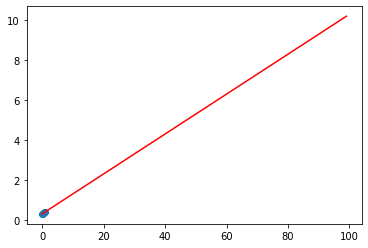

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_data,y_data,'o',markersize=5)
plt.plot(predicted,'r')
plt.show()

In [12]:
# 텐서플로우는 훈련광 ㅖ측이 하나로 되어있다 

In [13]:
from tensorflow.python.framework import ops
import os
ops.reset_default_graph()

In [14]:
sess = tf.Session()
x_vals = np.array([1.,3.,5.,7.,9.])
y_vals = np.array([1.,3.,5.,7.,9.])
x_data = tf.placeholder(tf.float32)
y_data = tf.placeholder(tf.float32)
m = tf.constant(3.)
prod = tf.multiply(x_data,y_data)

In [15]:


merged = tf.summary.merge_all()
if not os.path.exists('c://tmp/tensorboard_logs/'):
    os.makedirs('c://tmp/tensorboard_logs/')

my_writer = tf.summary.FileWriter('c://tmp/tensorboard_logs/',sess.graph)

# tensorboard --logdir=/tmp
# https://localhost:6006/

## 문제 
 x y의 규칙을 찾아라 

In [19]:
import numpy 
rng = numpy.random


#상수화할 때 좋은 점 : 대입으로해놓으면 나중에 값을 바꿀때 하나만 바꾸면되서 편하다 
learning_rate = 0.01
training_epochs = 4000
display_step = 50


train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 

In [25]:
# data point : 관측치 
n_samples = train_X.shape[0]  #차수가 0이면 행
X = tf.placeholder('float')
Y = tf.placeholder('float')
W = tf.Variable(rng.randn(),name='weight') #가중치는 설명한다
b = tf.Variable(rng.randn(),name ='bias')  #bias는 활성화 정도 
activation = tf.add(tf.multiply(X,W),b)  # X와 W를 곱하고  b를 더합  # y = ax + b 
# activation 예측값
cost = tf.reduce_sum(tf.pow(activation-Y,2))/(2*n_samples) #minibatch size 고려. zip으로 묶은 2개
#pow ^와 같다 . 2일때는 제곱 => 그이상은 3 4 5 6 승 

# 역전파 자동 수행 : optimizer 자체가 하이퍼파라미터가 됨 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #경사하강법
# optimizer 는 기울기와 학습률 고려   #momentum : 고려
    
    
    
init = tf.initialize_all_variables()



####여기까지 그래프를 정의하는 과정 _ node (연산)와 edge(데이터 전달 : tensor(배열적요소+행렬적요소 ))

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'init_1' type=NoOp>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Users\ICT01_06\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3346, in run_code
    return outflag  File "<ipython-input-24-ade72032846d>", line 13, in <module>
    init = tf.initialize_all_variables()  File "C:\Users\ICT01_06\Anaconda3\lib\site-packages\tensorflow\python\util\tf_should_use.py", line 193, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))


Epoch: 0001 cost= 8.157048225 W= 0.9040846 b= 0.45312053
Epoch: 0051 cost= 0.087184116 W= 0.30620977 b= 0.3941735
Epoch: 0101 cost= 0.086002953 W= 0.30284268 b= 0.41839695
Epoch: 0151 cost= 0.084958404 W= 0.2996756 b= 0.44117975
Epoch: 0201 cost= 0.084034652 W= 0.296697 b= 0.46260792
Epoch: 0251 cost= 0.083217740 W= 0.29389548 b= 0.4827621
Epoch: 0301 cost= 0.082495399 W= 0.29126063 b= 0.5017166
Epoch: 0351 cost= 0.081856608 W= 0.28878257 b= 0.51954377
Epoch: 0401 cost= 0.081291758 W= 0.28645188 b= 0.536311
Epoch: 0451 cost= 0.080792293 W= 0.28425962 b= 0.5520815
Epoch: 0501 cost= 0.080350623 W= 0.28219783 b= 0.5669144
Epoch: 0551 cost= 0.079960123 W= 0.28025857 b= 0.5808651
Epoch: 0601 cost= 0.079614840 W= 0.27843466 b= 0.593986
Epoch: 0651 cost= 0.079309523 W= 0.27671912 b= 0.6063279
Epoch: 0701 cost= 0.079039678 W= 0.27510574 b= 0.6179335
Epoch: 0751 cost= 0.078801103 W= 0.2735886 b= 0.6288477
Epoch: 0801 cost= 0.078590170 W= 0.27216172 b= 0.639113
Epoch: 0851 cost= 0.078403711 W= 0

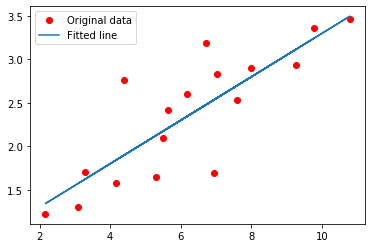

In [23]:
#세션을 연결한다 
#전제조건 :GPU가 존재한다 => 네트워크로 CPU GPU 연결하는 과정 ! 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs): # 동일 데이터를 4000번 반복한다 _ 데이터가 부족하기때문에
        for(x,y) in zip(train_X, train_Y):  #미니배치의 개념
            sess.run(optimizer, feed_dict={X: x, Y: y})
        if epoch % display_step ==0: # 50번마다 출력 
            print("Epoch:", '%04d' % (epoch+1),'cost=', '{:.9f}'.format(sess.run(cost,feed_dict={ 
                X:train_X, Y:train_Y})),  #출력될 때마다 비용 함수 출력( 감소함수) # ACCURAY는 증가함수 
                 "W=", sess.run(W), 'b=', sess.run(b))   #어느값으로 수렴하는지 
    print("최적화 종료")
    print('cost=', sess.run(cost, feed_dict={X:train_X, Y: train_Y}), 'W=', sess.run(W), 'b=', sess.run(b))
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    # PREDICT한 값 출력 
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b),
            label='Fitted line')
    plt.legend()
    plt.show()

In [27]:
# tensor => 직접 시각화 하는 것이 불가능
# sess 를 통해 numpy 포맷으로 바꿔주기 
import tensorflow as tf
def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

In [33]:
my_distribution = tf.random_uniform((600,400),seed=42) #6x4 : 데이터  24개
uniform = run_variable(my_distribution)

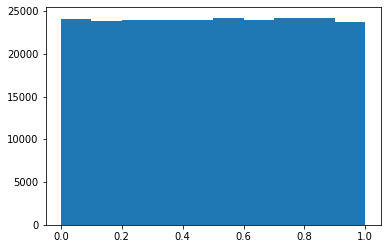

In [34]:
from matplotlib import pyplot as plt
plt.hist(uniform.flatten()) #flatten  데이터 메모리 저장 : 1차원으로 
plt.show() 



# 활성화 함수 activation fx

- 역할 : 회귀냐 분류냐 결정
- 비선형 매핑 ( 선형대수 -> 비선형문제로 변경)
- 가중치를 깊게하고 활성화함수 맵핑으로 xor문제를 해결

In [35]:
#그랲프 리셋해주기 항상 !

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

ops.reset_default_graph() #그래프 초기화
sess = tf.Session()

x_vals = np.linspace(start = -10.,stop=10.,num=100)
print(x_vals)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

[-0.  3. 10.]
[0.26894143 0.5        0.7310586 ]
[-0.7615942  0.         0.7615942]
[-0.63212055  0.          1.        ]
[-0.9999546  -0.99994444 -0.999932   -0.99991677 -0.99989814 -0.99987534
 -0.99984743 -0.99981327 -0.99977147 -0.99972031 -0.99965769 -0.99958106
 -0.99948727 -0.99937248 -0.999232   -0.99906006 -0.99884964 -0.9985921
 -0.99827691 -0.99789116 -0.99741905 -0.99684124 -0.99613408 -0.99526861
 -0.99420938 -0.99291301 -0.99132643 -0.98938465 -0.98700817 -0.98409965
 -0.98053999 -0.97618343 -0.97085155 -0.96432601 -0.95633957 -0.94656519
 -0.9346026  -0.9199619  -0.90204355 -0.88011378 -0.85327452 -0.82042669
 -0.78022512 -0.73102351 -0.67080701 -0.59710968 -0.50691352 -0.3965249
 -0.26142329 -0.0960761   0.1010101   0.3030303   0.50505051  0.70707071
  0.90909091  1.11111111  1.31313131  1.51515152  1.71717172  1.91919192
  2.12121212  2.32323232  2.52525253  2.72727273  2.92929293  3.13131313
  3.33333333  3.53535354  3.73737374  3.93939394  4.14141414  4.34343434
  4.

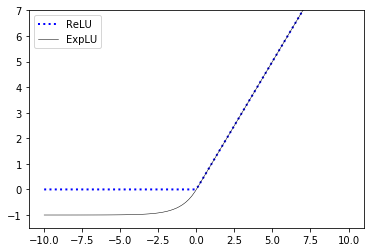

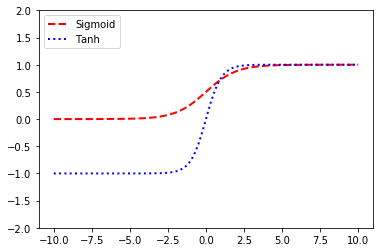

In [38]:
print(sess.run(tf.nn.relu([-3., 3., 10.])))  # 값의 범위: 0에서 무한대 -> relu 가 제일많이 쓰인다. relu 는 속도도 빠르고 빨리 최적화함  ( relu 수정본 : elu, softplus )
y_relu = sess.run(tf.nn.relu(x_vals))   # relu 의 단점 : 마이너스 값이 없다 ( 그것을 보완한 것이 elu) 

print(sess.run(tf.nn.sigmoid([-1., 0., 1.]))) # 값의 범위 0~1
y_sigmoid=sess.run(tf.nn.sigmoid(x_vals))

print(sess.run(tf.nn.tanh([-1., 0., 1.]))) # 값의 범위 -1~1
y_tanh = sess.run(tf.nn.tanh(x_vals))

print(sess.run(tf.nn.elu([-1., 0., 1.])))  # -1~무한대 까지 ( relu 의 수정본이다 ) 
y_elu=sess.run(tf.nn.elu(x_vals))
print(y_elu)
print(sess.run(tf.nn.softplus([-1., 0., 1.]))) # relu 의 각진단점을 보완한것이 softplus
y_softplus=sess.run(tf.nn.softplus(x_vals))
print(y_softplus)

plt.plot(x_vals, y_relu, 'b:', label='ReLU', linewidth=2)
plt.plot(x_vals,y_elu, 'k-', label='ExpLU', linewidth=0.5)
plt.ylim([-1.5,7])
plt.legend(loc='upper left')
plt.show()

plt.plot(x_vals, y_sigmoid,'r--', label="Sigmoid", linewidth=2)
plt.plot(x_vals, y_tanh, 'b:', label='Tanh', linewidth=2)
plt.ylim([-2,2])
plt.legend(loc='upper left')
plt.show()

In [62]:
ops.reset_default_graph() # 그래프 초기화
sess = tf.Session()
tf.set_random_seed(5) #시드의 초기값
np.random.seed(42)
batch_size = 50

a1 = tf.Variable(tf.random_normal(shape=[1,1])) #가중치

b1 = tf.Variable(tf.random_uniform(shape=[1,1]))# bias

a2 = tf.Variable(tf.random_normal(shape=[1,1])) #가중치 

b2 = tf.Variable(tf.random_uniform(shape=[1,1])) #bias


x = np.random.normal(2,0.1,500)  # 500개 뽑기 

# shape=[None,1] :사이즈를 fix하지않고 입력데이터로 부터 계산 / # 행데이터로 생성 
x_data = tf.placeholder(shape=[None,1],dtype=tf.float32)


In [63]:
# y = ax + b 

#어떤 값이라도 sigmoid 통과하면 값이 0~1사이로 mapping

sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data,a1),b1))

#어떤 값이라도 relu 통과하면 값이 0~ oo 사이로 mapping
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data,a2),b2
                                    
# 0.75로 수렴과정:
# MSE                                    
                                    
loss1= tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation,0.75)))
                            
loss2= tf.reduce_mean(tf.square(tf.subtract(relu_activation,0.75)))                            
                            
init = tf.global_variables_initializer()
                            
sess.run(init)
my_opt=tf.train.GradientDescentOptimizer(0.01)# 학습률 0.01
train_step_sigmoid = my_opt.minimize(loss1)                                            
train_step_relu = my_opt.minimize(loss2)                       
print('\n Sigmoid AND Relu 함수의 최적화 0.75')


 Sigmoid AND Relu 함수의 최적화 0.75


In [64]:
loss_vec_sigmoid =[] #로스값을 저장하기위해서  만들어놈  # 밑에서 APPEND로 추가함 
loss_vec_relu=[]

In [66]:
for i in range(500): # 500번 돈다
    # 500 => 50
    rand_indices = np.random.choice(len(x),size= batch_size)
    x_vals = np.transpose([x[rand_indices]])
    sess.run(train_step_sigmoid, feed_dict={x_data:x_vals})
    sess.run(train_step_relu,feed_dict={x_data:x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1,feed_dict={x_data:x_vals}))
    loss_vec_relu.append(sess.run(loss2,feed_dict={x_data:x_vals}))
    
    sigmoid_output = np.mean(sess.run(sigmoid_activation,feed_dict={x_data:x_vals}))
    relu_output = np.mean(sess.run(relu_activation,feed_dict={x_data:x_vals}))
    if i%50==0: #50번에 한번씩
        print('sigmoid =' + str(np.mean(sigmoid_output))+ 'relu ='+ str(np.mean(relu_output)))
        
#0.75 수렴하는 과정 

sigmoid =0.12930582relu =1.8877889
sigmoid =0.17661771relu =0.7568796
sigmoid =0.2541377relu =0.74418783
sigmoid =0.34693393relu =0.74961424
sigmoid =0.4502716relu =0.74353874
sigmoid =0.5281099relu =0.7499316
sigmoid =0.58489215relu =0.7503509
sigmoid =0.6255449relu =0.7521825
sigmoid =0.6554158relu =0.75160563
sigmoid =0.67665017relu =0.7494941


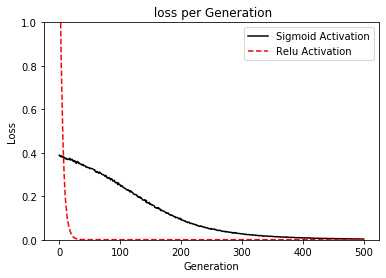

In [67]:
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title(' loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show() 